Decision Tree


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numba
import cv2 as cv

In [2]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [3]:
dataset = "https://raw.githubusercontent.com/calvinr14/datamining/gh-pages/iris.data.csv"
data = pd.read_csv(dataset)

In [4]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
data.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [6]:
data.shape

(149, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
data.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
data["Iris-setosa"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Iris-setosa, dtype: int64

In [11]:
data=data.replace(to_replace='Iris-setosa',value=0)
data=data.replace(to_replace='Iris-versicolor',value=1)
data=data.replace(to_replace='Iris-virginica',value=2)

In [12]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [13]:
data['Iris-setosa'].value_counts()

1    50
2    50
0    49
Name: Iris-setosa, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [15]:
X=data.iloc[:,1:-1]
X.head()

,3.5,1.4,0.2
0,3.0,1.4,0.2
1,3.2,1.3,0.2
2,3.1,1.5,0.2
3,3.6,1.4,0.2
4,3.9,1.7,0.4


In [16]:
Y=data.iloc[:,-1:]
Y.head()

,Iris-setosa
0,0
1,0
2,0
3,0
4,0


In [17]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
giniindex=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,random_state=100)

In [19]:
giniindex.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [20]:
y_pred=giniindex.predict(X_test)

In [21]:
confusion_matrix(Y_test,y_pred)

array([[10,  0,  0],
       [ 0,  6,  3],
       [ 0,  0, 11]])

In [22]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



In [23]:
entropy_deci=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,random_state=100)

In [24]:
entropy_deci.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [25]:
y_pred_entropy=entropy_deci.predict(X_test)

In [26]:
confusion_matrix(Y_test,y_pred_entropy)

array([[10,  0,  0],
       [ 0,  6,  3],
       [ 0,  0, 11]])

In [27]:
print(classification_report(Y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



In [28]:
from sklearn import tree

[Text(0.4, 0.875, 'X[2] <= 0.8\ngini = 0.666\nsamples = 119\nvalue = [39, 41, 39]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.625, 'X[2] <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.375, 'X[1] <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

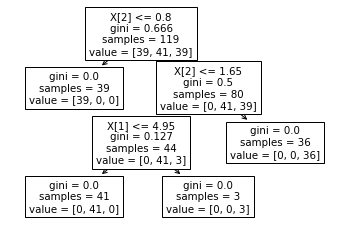

In [29]:
tree.plot_tree(giniindex)

[Text(0.4, 0.875, 'X[2] <= 0.8\nentropy = 1.585\nsamples = 119\nvalue = [39, 41, 39]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.625, 'X[2] <= 1.65\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.375, 'X[1] <= 4.95\nentropy = 0.359\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

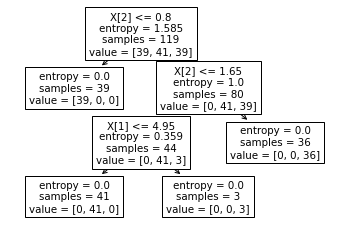

In [30]:
tree.plot_tree(entropy_deci)